In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc("font", size=18) # для увеличения шрифта подписей графиков

In [3]:
# загружаем данные
houses = pd.read_csv("1.4_houses.csv")

In [5]:
houses.head(7)

,dim_1,dim_2,level,price
0,29,28,luxury,2212.0
1,28,29,luxury,2203.0
2,6,9,basic,254.0
3,5,9,basic,242.0
4,6,6,basic,195.0
5,5,8,basic,200.0
6,27,29,luxury,2108.0


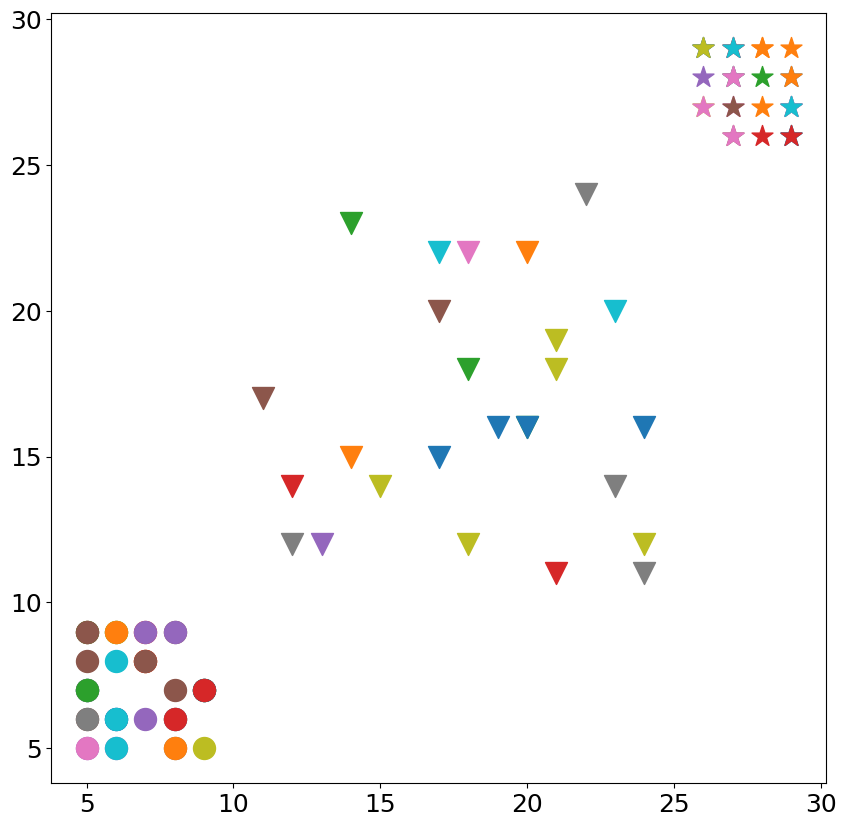

In [6]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку

markers = {"basic": "o", "medium": "v", "luxury": "*"}
for d1, d2, l in zip(houses.dim_1, houses.dim_2, houses.level):
    plt.scatter(d1, d2, s=250, marker=markers[l])

# отображаем картинку
plt.show()

In [16]:
# импортируем модуль, отвечающий за кластеризацию
import os
os.environ["OMP_NUM_THREADS"] = '1'

from sklearn.cluster import KMeans

In [17]:
# выгружаем признаки в отдельную переменную
X = houses[["dim_1", "dim_2"]]

# создаем модель для кластеризации
clust = KMeans(n_clusters=3, n_init='auto', ).fit(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [22]:
clust.cluster_centers_

array([[27.42424242, 27.51515152],
       [ 6.76744186,  7.1627907 ],
       [18.5       , 16.45833333]])

In [23]:
# смотрим центры кластеров
[c1, c2, c3] = clust.cluster_centers_

In [24]:
clust.cluster_centers_

array([[27.42424242, 27.51515152],
       [ 6.76744186,  7.1627907 ],
       [18.5       , 16.45833333]])

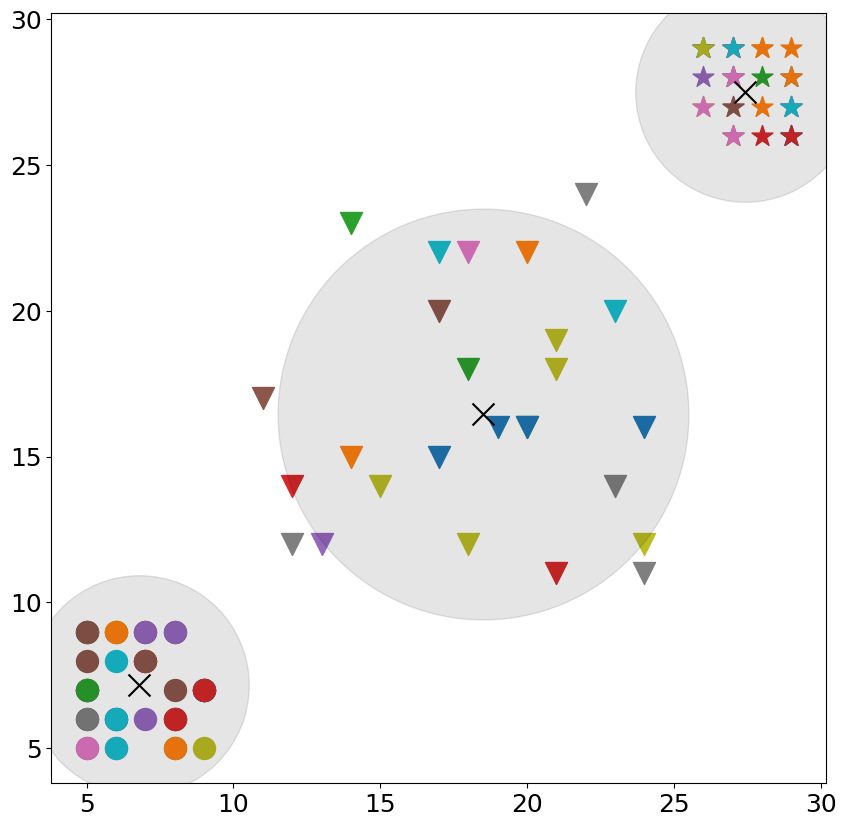

In [25]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку

markers = {"basic": "o", "medium": "v", "luxury": "*"}
for d1, d2, l in zip(houses.dim_1, houses.dim_2, houses.level):
    plt.scatter(d1, d2, s=250, marker=markers[l])

# добавляем информацию о центрах кластеров
plt.scatter(c1[0], c1[1], s=250, marker="x", c="black")
plt.scatter(c1[0], c1[1], s=250 * 1e2, c="black", alpha=0.1)

plt.scatter(c2[0], c2[1], s=250, marker="x", c="black")
plt.scatter(c2[0], c2[1], s=250 * 1e2, c="black", alpha=0.1)

plt.scatter(c3[0], c3[1], s=250, marker="x", c="black")
plt.scatter(c3[0], c3[1], s=250 * 3.5e2, c="black", alpha=0.1)

# отображаем картинку
plt.show()